## Import Libraries

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats
import sys
# parent directory of 'analysis' to the Python path
sys.path.append(os.path.abspath(".."))
import importlib.util
# Load main.py
main_path = "/home/ruby/Nazmus Shakib/AARC Lab/String_stability_project/main.py"
spec = importlib.util.spec_from_file_location("main", main_path)
main = importlib.util.module_from_spec(spec)
spec.loader.exec_module(main)

## Setting plotting style

In [5]:
# Plot styling
axes_size = 24
tick_size = 18
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times"]
rcParams["font.size"] = tick_size
rcParams["axes.labelsize"] = axes_size
rcParams["xtick.labelsize"] = axes_size
rcParams["ytick.labelsize"] = axes_size
rcParams["legend.fontsize"] = tick_size


## Plotting

In [6]:
def plot_speed_from_csv(csv_path, ref_speed=15, xlim=(0, None), ylim=(None, None), is_idm = False, freq = 10,
                        save_pdf=False, save_path=None, fig_size=(10, 3), dpi=300):
    # Load CSV
    df = pd.read_csv(csv_path)
    vehicle_order = sorted(df["vehicle_id"].unique(), key=lambda x: int(x.replace("veh", "")))

    follower_color = "#7202CE"
    all_follower_color = "#CE029B"
    leader_color = "#A30096"
    custom_colors = ["#A30096", '#38028F', '#8F0202', '#8F0244', '#02448F', '#028F4A', '#8F6A02', "#00B1B8"]
    n_colors = len(custom_colors)

    del_t = 1/freq

    # Plot
    plt.figure(figsize=fig_size)
    for idx, veh_id in enumerate(vehicle_order):
        veh_data = df[df["vehicle_id"] == veh_id]
        time = veh_data["time_step"] * del_t
        speed = veh_data["speed_mps"]
        ref_vel = veh_data["ref_vels"] if "ref_vels" in veh_data.columns else None

        if idx == 0:
            label = "Leader"
            linestyle = '-'
            linewidth = 1.5
            plt.plot(time, speed, label=label, linestyle=linestyle, linewidth=linewidth, color=custom_colors[0])
        # elif idx == 1:
        #     label = "Vehicle 1"
        #     linestyle = '-'
        #     linewidth = 1
        #     plt.plot(time, speed, label=label, linestyle=linestyle, linewidth=linewidth)
        #     # plt.plot(time, ref_vel, linestyle='--', linewidth=1, label=f"{label} r (ref)")
        else:
            follower_num = idx
            color = custom_colors[idx % n_colors]
            role = veh_data["role"].iloc[0].split("(")[-1].replace(")", "") if "IDM" in veh_data["role"].iloc[0] else "unknown"
            label = f"Vehicle {follower_num}"
            linestyle = '-'
            linewidth = 1
            plt.plot(time, speed, linestyle=linestyle, label=f"{label}", linewidth=linewidth, color=color)

        # if ref_vel is not None and ref_vel.notnull().any():
        #     plt.plot(time, ref_vel, linestyle='-.', linewidth=1, label=f"{label} r (ref)")

        # plt.plot(time, speed, label=label, linestyle=linestyle, linewidth=linewidth)
    #plt.plot(time, speed, label = "Follower", linestyle=linestyle, linewidth=linewidth, color=all_follower_color)
    
    

    plt.xlabel(r"\textbf{Time (s)}")
    plt.ylabel(r"\textbf{Speed (m/s)}")
    # plt.title(r"\textbf{Speed Over Time}")
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)

    if not is_idm:
        # Add vertical dashed line at switching time
        switch_time = 120  # seconds
        plt.axvline(x=switch_time, color='purple', linestyle='--', linewidth=1)

        # Add text annotations
        plt.text(switch_time - 50, plt.ylim()[1]*0.5, "All Manual Driving", 
                fontsize=20, ha='center', va='top', color='black')
        plt.text(switch_time + 70, plt.ylim()[1]*0.5, "Mixed Autonomy", 
                fontsize=20, ha='center', va='top', color='black')
        plt.text(switch_time+2, plt.ylim()[1]*0.52, "FS Activation", fontsize=20, rotation=90, color='purple')
        plt.title(r"\textbf{Speed Profiles Under Mixed Autonomy with FS Controller}")
    else:
        plt.title(r"\textbf{Speed Profiles Under Fully Human-Driven Behavior (IDM)}")


    # Axis limits
    if xlim[0] is not None or xlim[1] is not None:
        plt.xlim(left=xlim[0], right=xlim[1])
    if ylim[0] is not None or ylim[1] is not None:
        plt.ylim(bottom=ylim[0], top=ylim[1])

    plt.tight_layout()

    if save_pdf:
        if save_path is None:
            save_path = f"NC_plot_r{ref_speed}.pdf"
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=dpi, format="pdf", bbox_inches='tight')
        print(f"Plot saved to: {save_path}")

    plt.show()


## Call function to plot for specific simulation data

Plot saved to: ../figures/straight/latest_50_FS_IDM_followers_7.pdf


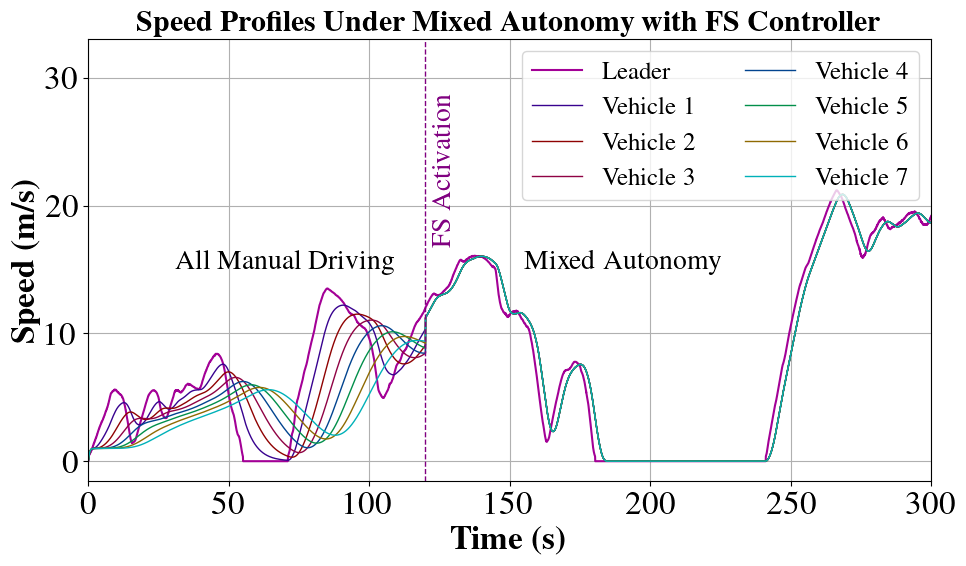

In [7]:
ref_speed = 30 
freq = 50
n_followers = 7
csv_path = f"../output/straight/latest_50_IDM_FS_followers_7.csv"

plot_speed_from_csv(
    csv_path=csv_path,
    ref_speed=ref_speed,
    xlim=(0, 300),
    ylim=(None, None),
    freq = 50,
    is_idm = False,
    save_pdf=True,
    fig_size=(10, 6),
    save_path=f"../figures/straight/latest_{freq}_FS_IDM_followers_{n_followers}.pdf"
)

### All follower driven by IDM

Plot saved to: ../figures/straight/latest_50_all_IDM_followers_7.pdf


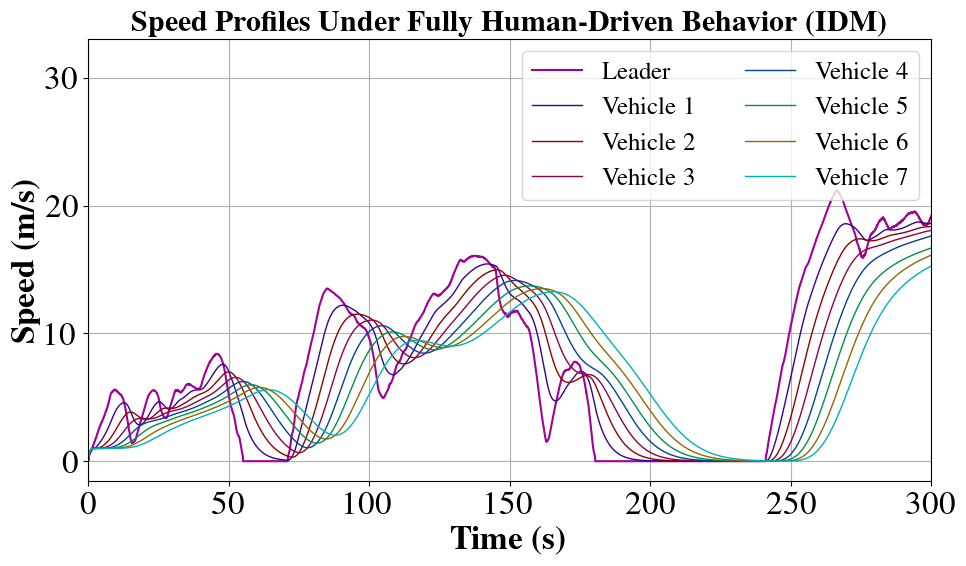

In [8]:
ref_speed = 20
csv_path = f"../output/straight/latest_50_all_IDM_followers_7.csv"

plot_speed_from_csv(
    csv_path=csv_path,
    ref_speed=ref_speed,
    xlim=(0, 300),
    ylim=(None, None),
    save_pdf=True,
    fig_size=(10, 6),
    is_idm = True,
    freq = 50,
    save_path=f"../figures/straight/latest_{freq}_all_IDM_followers_{n_followers}.pdf"
)

### Spatio-temporal plot

In [9]:
def plot_spatiotemporal_heatmap(df, new_cmap, freq=100, save_pdf = False, dpi = 300, save_path = None):
    """
    Plots space-time (spatio-temporal) heatmap.
    
    Parameters:
    df: pandas DataFrame with at least ['time_step', 'x', 'speed_mps']
    new_cmap: colormap object (e.g., plt.cm.RdYlGn)
    """

    # Make a copy to avoid modifying original DataFrame
    data = df.copy()

    # Rename columns to standard names
    data = data.rename(columns={
        'speed_mps': 'speed',
        'x': 'pos',
        'time_step': 'time'
    })

    # Drop NaNs and keep only nonnegative times
    data = data.dropna(subset=['speed', 'pos', 'time'])
    data = data[data['time'] >= 0]
    data['time'] = (data['time'] * 1/freq).astype(float)  # keep as float seconds

    # Set the number of bins for the grid
    num_bins_time = 200
    num_bins_pos = 400

    # Calculate average speed in each (time, pos) bin
    h, xedges, yedges, binnumbers = scipy.stats.binned_statistic_2d(
        data['time'],
        data['pos'],
        data['speed'],
        statistic='mean',
        bins=[num_bins_time, num_bins_pos]
    )

    # Calculate the overall mean speed
    overall_mean_speed = np.nanmean(data['speed'])
    print("Overall mean speed:", overall_mean_speed)

    # Leave NaNs in h → will show as white if cmap 'bad' set
    #h[np.isnan(h)] = overall_mean_speed  # do NOT fill

    # Prepare colormap with white for missing data
    cmap = new_cmap.with_extremes(bad='white')

    # Plot heatmap
    plt.figure(figsize=(10, 4))
    #plt.ylim(data['pos'].min(), data['pos'].max())
    # Important fix: use bin limits for axes
    plt.xlim(xedges[0], xedges[-1])
    plt.ylim(yedges[0], 8000)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    pcm = plt.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         rasterized=True, vmin=0, vmax=33, shading="auto")

    cbar = plt.colorbar(pcm, label="Speed (m/s)", pad=0)
    cbar.set_label(r'\textbf{Speed (m/s)}', fontsize=18)
    cbar.ax.tick_params(labelsize=20)

    plt.xlabel(r'\textbf{Time (s)}', fontsize=18)
    plt.ylabel(r'\textbf{Longitudinal Position (m)}', fontsize=18)
    plt.title(r"\textbf{Time–Space Heatmap of Vehicle Speeds}", fontsize=20)
    if save_pdf:
        if save_path is None:
            save_path = f"NC_plot_r{ref_speed}.pdf"
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=dpi, format="pdf", bbox_inches='tight')
        print(f"Plot saved to: {save_path}")

    plt.show()


def plot_time_space_diagram(df, start_time=None, end_time=None, freq = 100, save_pdf = False, dpi = 300, save_path = None):
    x_max = df['x'].max()
    x_min = df['x'].min()
    #df['x'] = x_max - df['x']  # Remaps [x_min, x_max] to [x_max - x_min, 0]
    # Optional time filtering
    if start_time is not None:
        df = df[df['time_step'] >= start_time*freq]
    if end_time is not None:
        df = df[df['time_step'] <= end_time*freq]

    df['time_step'] = (df['time_step'] * 1/freq).astype(float) 
    # Plot
    plt.figure(figsize=(10, 5))
    for vehicle_name in df['role'].unique():
        vehicle_df = df[df['role'] == vehicle_name]
        plt.plot(vehicle_df['time_step'], vehicle_df['x'], label=vehicle_name)
    plt.xlabel(r'\textbf{Time (s)}', fontsize=18)

    plt.ylabel(r'\textbf{Longitudinal Position (m)}', fontsize=18)
    plt.title(r"\textbf{Time–Space Heatmap of Vehicle Speeds}", fontsize=20)
    plt.legend(loc='upper left', ncol=2)

    plt.grid(True)
    plt.tight_layout()

    # Axis limits
    plt.xlim(left=start_time, right=end_time)
    #plt.ylim(bottom=ylim[0], top=ylim[1])
    if save_pdf:
        if save_path is None:
            save_path = f"NC_plot_r{ref_speed}.pdf"
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=dpi, format="pdf", bbox_inches='tight')
        print(f"Plot saved to: {save_path}")

    plt.show()

Overall mean speed: 15.678914753
Plot saved to: ../figures/straight/heatmap_FS_IDM_followers.pdf


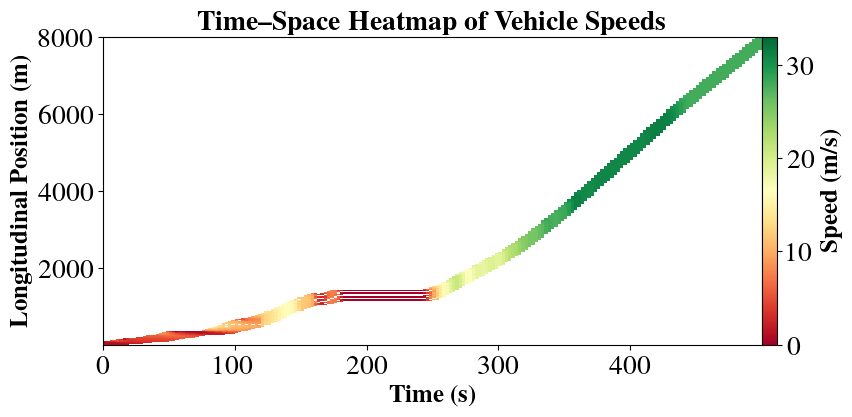

Plot saved to: ../figures/straight/space_time_FS_IDM_followers.pdf


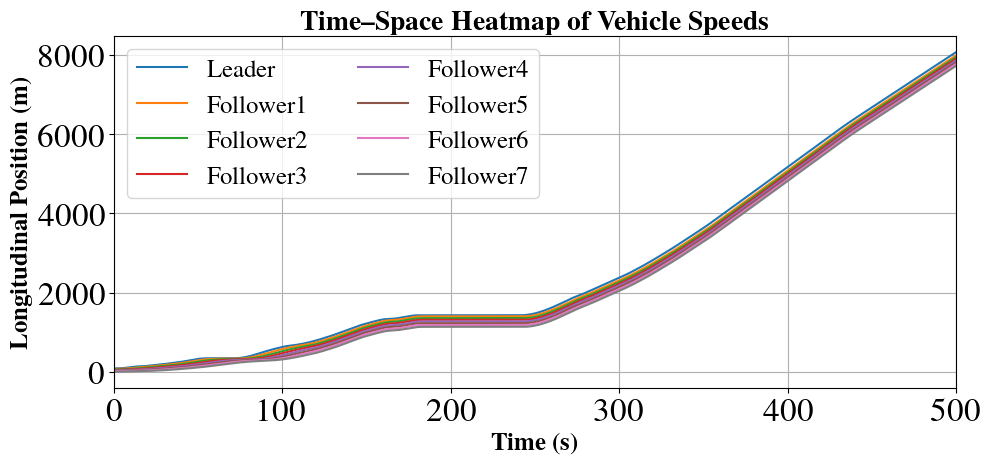

In [10]:
#plot spatio-temporal plot
freq =50
df = pd.read_csv("../output/straight/latest_50_IDM_FS_followers_7.csv")
save_heatmap = "../figures/straight/heatmap_FS_IDM_followers.pdf"
save_space_time = "../figures/straight/space_time_FS_IDM_followers.pdf"
plot_spatiotemporal_heatmap(df, new_cmap=plt.cm.RdYlGn, freq=freq, save_pdf=True, save_path=save_heatmap)
plot_time_space_diagram(df, start_time=0, end_time=500, freq=freq, save_pdf=True, save_path=save_space_time)

Overall mean speed: 12.82700196
Plot saved to: ../figures/straight/heatmap_all_IDM_followers.pdf


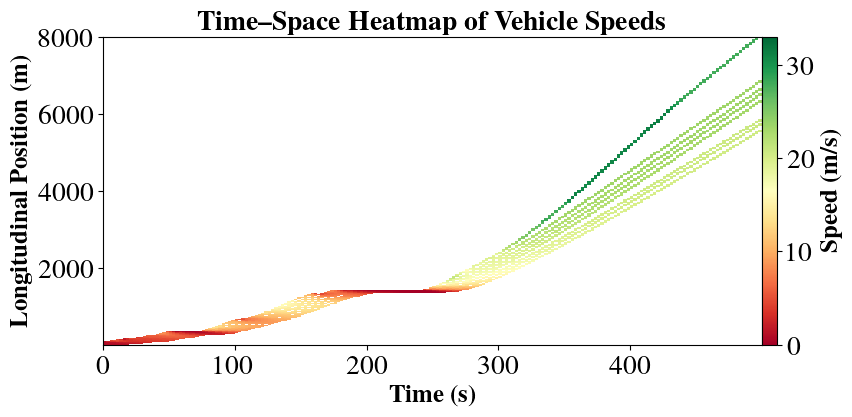

Plot saved to: ../figures/straight/space_time_all_IDM_followers.pdf


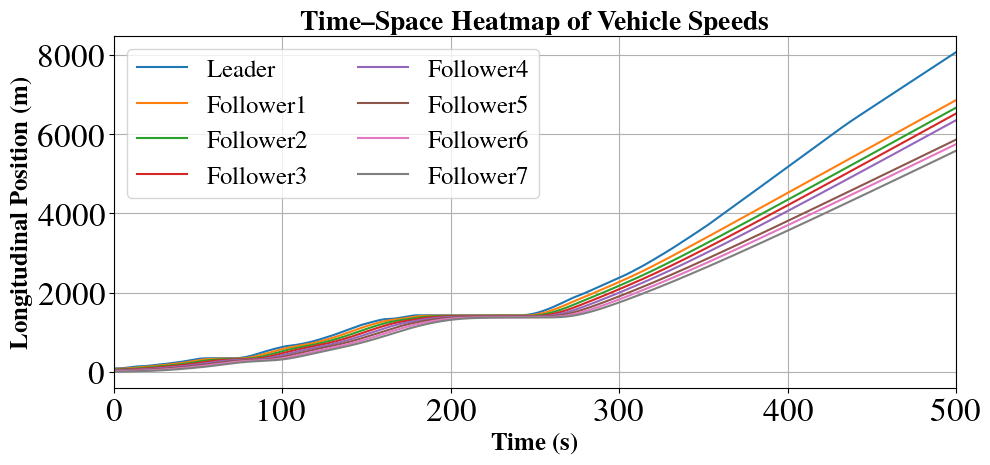

In [11]:
df = pd.read_csv("../output/straight/latest_50_all_IDM_followers_7.csv")
save_heatmap = "../figures/straight/heatmap_all_IDM_followers.pdf"
save_space_time = "../figures/straight/space_time_all_IDM_followers.pdf"
plot_spatiotemporal_heatmap(df, new_cmap=plt.cm.RdYlGn, freq=freq, save_pdf=True, save_path=save_heatmap)
plot_time_space_diagram(df, start_time=0, end_time=500, freq=freq, save_pdf=True, save_path=save_space_time)

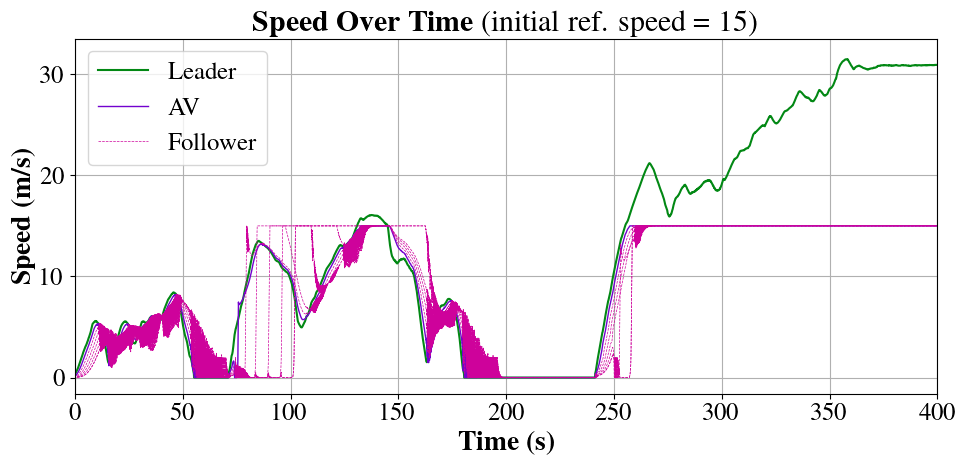

In [61]:
ref_speed = 15
plot_speed_from_csv(
    csv_path=f"../output/straight/mx_all_AV_NC_modified_FS_r{ref_speed}_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 400),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/_NC_plot_r{ref_speed}_idm.pdf"
)


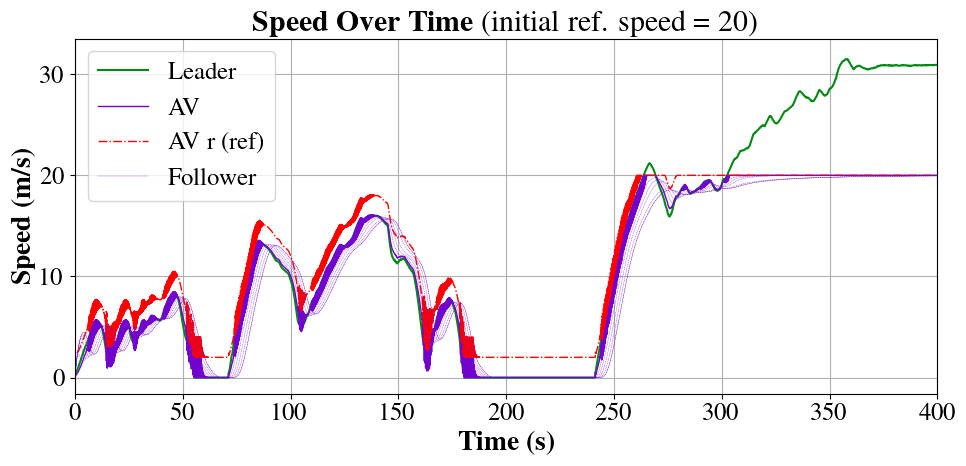

In [8]:
ref_speed = 20

plot_speed_from_csv(
    csv_path="../output/straight/_NC_modified_FS_r20_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 400),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/_NC_plot_r{ref_speed}_idm.pdf"
)

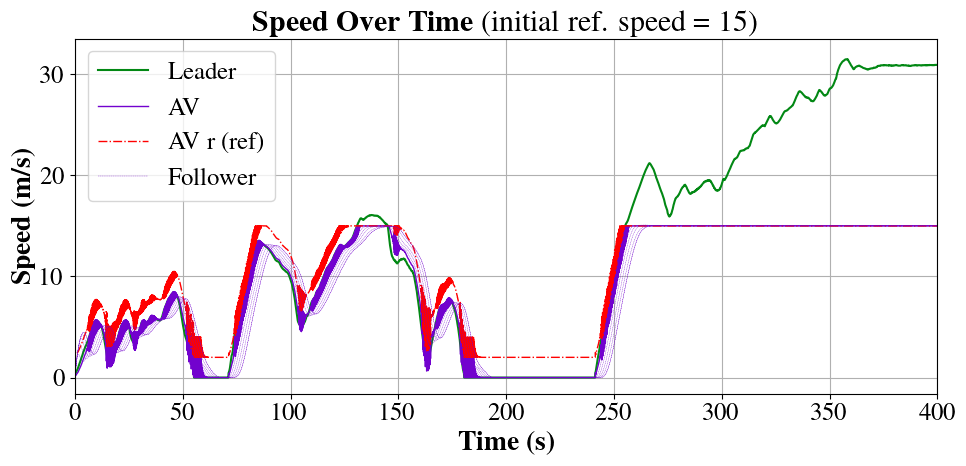

In [9]:
ref_speed = 15

plot_speed_from_csv(
    csv_path="../output/straight/_NC_modified_FS_r15_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 400),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/NC_plot_r{ref_speed}_idm.pdf"
)

## For Ring Road

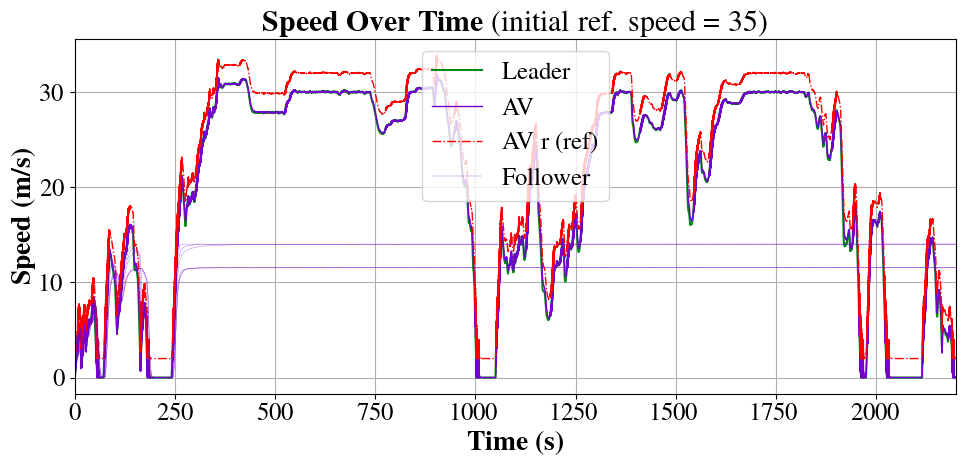

In [17]:
ref_speed = 35

plot_speed_from_csv(
    csv_path="../output/ring/_NC_modified_FS_r35_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 2200),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/_NC_plot_r{ref_speed}_idm.pdf"
)

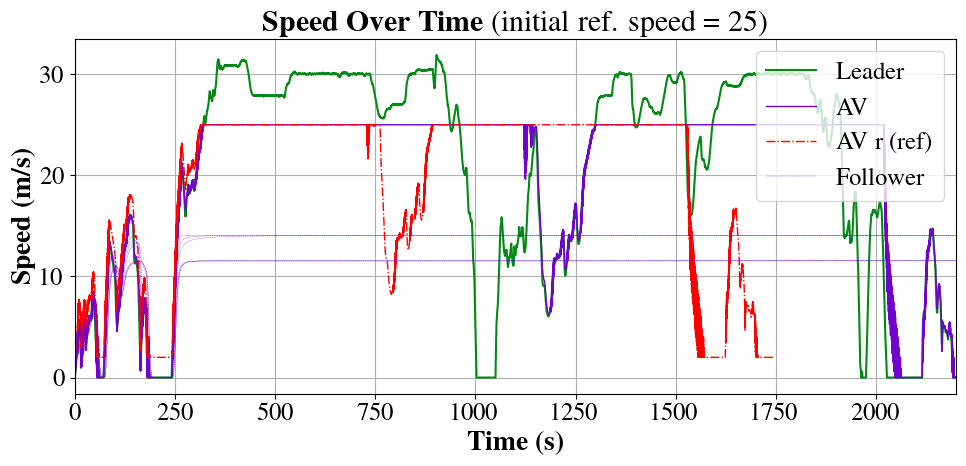

In [18]:
ref_speed = 25

plot_speed_from_csv(
    csv_path="../output/ring/_NC_modified_FS_r25_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 2200),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/_NC_plot_r{ref_speed}_idm.pdf"
)

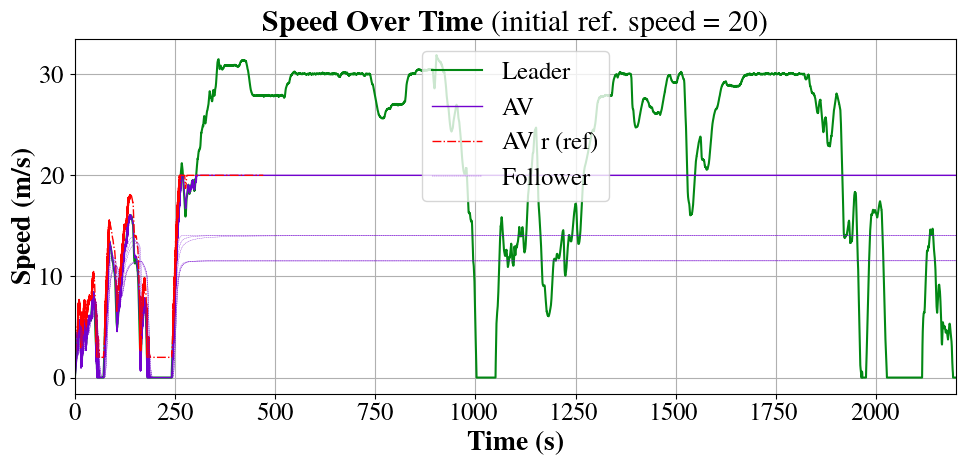

In [19]:
ref_speed = 20

plot_speed_from_csv(
    csv_path=f"../output/ring/_NC_modified_FS_r{ref_speed}_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 2200),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/_NC_plot_r{ref_speed}_idm.pdf"
)

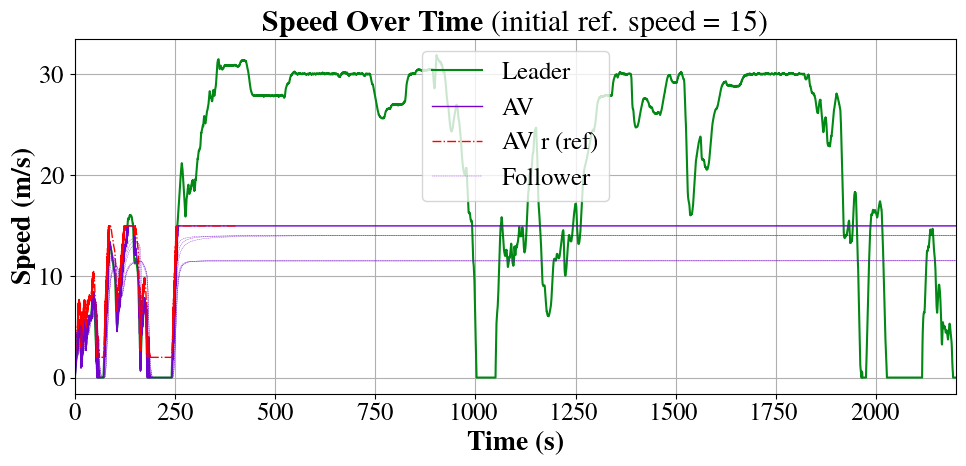

In [20]:
ref_speed = 15

plot_speed_from_csv(
    csv_path=f"../output/ring/_NC_modified_FS_r{ref_speed}_simulation_with_real_data_6followers.csv",
    ref_speed=ref_speed,
    xlim=(0, 2200),
    ylim=(None, None),
    save_pdf=False,
    fig_size=(10, 5),
    save_path=f"../figures/straight/_NC_plot_r{ref_speed}_idm.pdf"
)

## Actual Dataset info

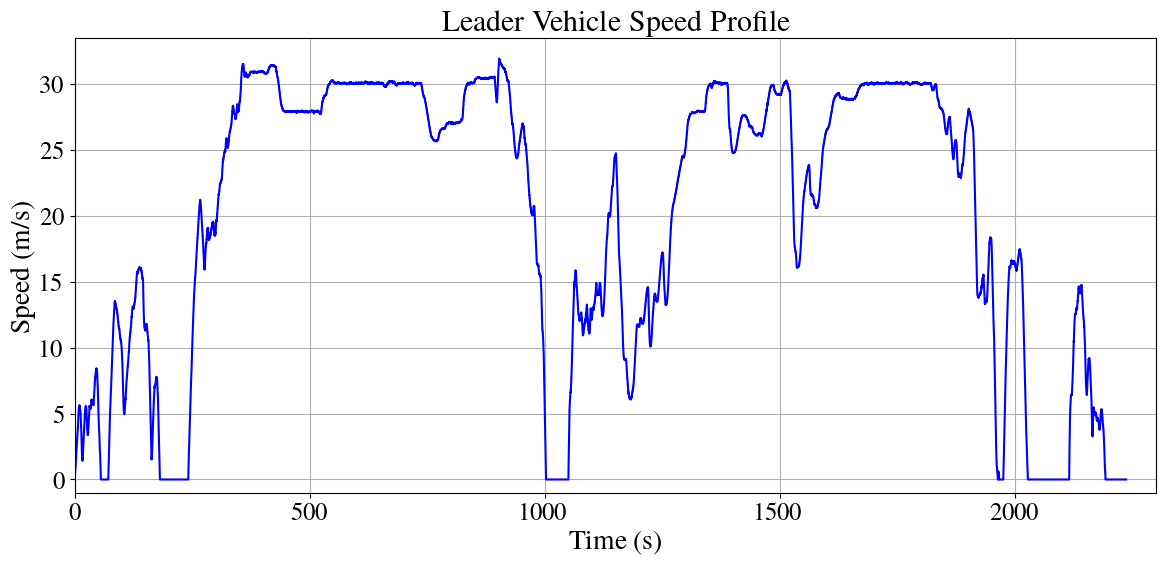

In [75]:
# original dataset load and plot
# Load CSV
csv_path = "../controller/2021-07-26-21-10-20_2T3H1RFV8LC057037_CAN_Messages_decoded_speed.csv"
df = pd.read_csv(csv_path)

# Preprocess
time_col = df.columns[0]  # first column is POSIX timestamp
speed_col = "Message"     # speed column

# Fill missing speed values with 0
df[speed_col] = df[speed_col].fillna(0)

# Skip leading zero speeds
start_idx = next((i for i, s in enumerate(df[speed_col]) if s > 0), 0)
df = df.iloc[start_idx:].reset_index(drop=True)

# Convert POSIX timestamp to relative time (seconds)
start_time = df[time_col].iloc[0]

df["time_relative"] = df[time_col] - start_time
# print(df["time_relative"][0:20])

# Convert speed from km/h to m/s
df["speed_mps"] = df[speed_col] * (1000 / 3600)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df["time_relative"], df["speed_mps"], label="Speed (m/s)", color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Leader Vehicle Speed Profile")
plt.grid(True)
# plt.legend()
plt.tight_layout()
plt.xlim(left=0, right = 2300)
plt.ylim(bottom=-1, top=None)
# Save the figure as high-resolution PDF
plt.savefig("/home/ruby/Nazmus Shakib/AARC Lab/String_stability_project/figures/leader_speed_profile.pdf", 
            format='pdf', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
# Calculate average speed (in m/s) from the trimmed dataset
avg_speed_mps = df["speed_mps"].mean()
print(f"Average speed (m/s): {avg_speed_mps:.2f}")


Average speed (m/s): 19.94


In [40]:
# Preprocess
time_col = df.columns[0]
speed_col = 'Message'

df[speed_col] = df[speed_col].fillna(0)
df['speed_mps'] = df[speed_col] * (1000 / 3600)  # km/h to m/s

# Compute relative time
start_time = df[time_col].iloc[0]
df['time_relative'] = df[time_col] - start_time

# Compute time differences
df['delta_t'] = df['time_relative'].diff().fillna(0)

# Compute per-step distance
df['step_distance'] = df['speed_mps'] * df['delta_t']

# Sum total distance
total_distance_m = df['step_distance'].sum()
total_distance_km = total_distance_m / 1000

print(f"Total travel distance: {total_distance_m:.2f} meters (~{total_distance_km:.2f} km)")

Total travel distance: 44599.08 meters (~44.60 km)
